In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from sklearn.model_selection import train_test_split
import random

In [3]:
def show_img(img):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    if len(img.shape) == 3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img2, cmap='gray')
    else:
        img2 = img
        plt.imshow(img2, cmap='gray')
        plt.show()

In [4]:
%load_ext autoreload
%autoreload 2
from utils.preprocess_utils import *

# part1 read train/test data and save to pickle

In [5]:
train_folders = 'data/train'
test_folders = 'data/test'


In [6]:
## Run for once 
# train_mat =  os.path.join(train_folders, 'digitStruct.mat')
# train_data = get_data_info(train_mat)

# test_mat =  os.path.join(test_folders, 'digitStruct.mat')
# test_data = get_data_info(test_mat)

train_data_name = 'data/train_data.pkl'
# with open(train_data_name, 'wb') as f:
#     pickle.dump(train_data, f)

test_data_name = 'data/test_data.pkl'
# with open(test_data_name, 'wb') as f:
#     pickle.dump(test_data, f)

with open(train_data_name, 'rb') as f:
    train_data = pickle.load(f)

with open(test_data_name, 'rb') as f:
    test_data = pickle.load(f)

# part2 prepare data to the format that can be trained

In [34]:
shape = (64, 64)

In [35]:
train_formatter = DataFormatter(train_data, train_folders, shape, add_neg=True)
train_dataset, train_labels = train_formatter.get_formatted_data_for_modeling()

dataset: (86345, 64, 64)
labels: (86345, 6)


In [36]:
test_formatter = DataFormatter(test_data, test_folders, shape, add_neg=False)
test_dataset, test_labels = test_formatter.get_formatted_data_for_modeling()

dataset: (13066, 64, 64)
labels: (13066, 6)


# part2.1 prepare data for three channel

In [7]:
shape = (64, 64)

In [8]:
train_formatter = DataFormatter(train_data, train_folders, shape, channel=3, add_neg=True)
train_dataset, train_labels = train_formatter.get_formatted_data_for_modeling()

test_formatter = DataFormatter(test_data, test_folders, shape, channel=3, add_neg=False)
test_dataset, test_labels = test_formatter.get_formatted_data_for_modeling()

dataset: (86345, 64, 64, 3)
labels: (86345, 6)
dataset: (13066, 64, 64, 3)
labels: (13066, 6)


# part 3  Split train to train and validation

In [9]:
data_save_name = 'data/train_test_val_64_3_channel.pkl'

In [10]:
X_train, X_val, y_train, y_val = train_test_split(train_dataset, train_labels, test_size=0.2, random_state=0)

In [11]:
# save data set
data_result = {
    'X_train': X_train,
    'X_val': X_val,
    'y_train': y_train,
    'y_val': y_val,
    'X_test': test_dataset,
    'y_test': test_labels
    
}
with open(data_save_name, 'wb') as f:
    pickle.dump(data_result, f)

OverflowError: cannot serialize a bytes object larger than 4 GiB

# part4: Maybe explore

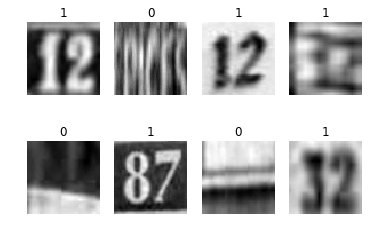

In [40]:
def disp_sample_dataset(dataset, label):
    items = random.sample(range(dataset.shape[0]), 8)
    for i, item in enumerate(items):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.title(label[i][-1])
        plt.imshow(dataset[i,:,:], cmap='gray')
disp_sample_dataset(X_train, y_train)